the objective of this notebook is to explore the $k$-NN estimator for calculating divergences between two "bags". Each "bag" represents an independent and identically distributed sample from some unknown probability distribution. 

In [1]:
import numpy as np 

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
from skl_groups.divergences import KNNDivergenceEstimator
from skl_groups.features import Features

lets try to get the divergence between two same bags...

In [6]:
mvn = np.random.multivariate_normal

In [70]:
sample1 = mvn([0.,0.], np.identity(2), size=100)
sample2 = mvn([0.,0.], np.identity(2), size=101)

(-3.0, 3.0)

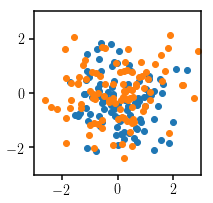

In [71]:
plt.figure(figsize=(3,3))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])
plt.xlim([-3., 3.])
plt.ylim([-3., 3.])

In [78]:
kNN = KNNDivergenceEstimator(div_funcs=["renyi:.8"], Ks=[3])#, version='slow')

In [79]:
feat = Features([sample1, sample2])

In [80]:
print feat

<Features: 2 bags with 100 to 101 2-dimensional points (201 total)>


In [81]:
div_knn = kNN.fit_transform(feat)

Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs
Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs


In [82]:
print div_knn

[[[[-0.          0.12223326]
   [ 0.09261867 -0.        ]]]]


In [83]:
div_1to2 = div_knn[0][0][0][1]
div_2to1 = div_knn[0][0][1][0]
print div_1to2, div_2to1

0.122233 0.0926187


lets try to use it to measure non-Gaussianity

In [88]:
gauss = mvn([0.], np.identity(1), size=200)
nongauss = np.abs(mvn([0.], np.identity(1), size=120))

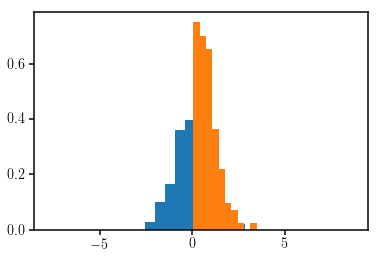

In [92]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(gauss, normed=True)
_ = sub.hist(nongauss, normed=True)

In [90]:
kNN = KNNDivergenceEstimator(div_funcs=["renyi:.8"], Ks=[2], version='slow')
feat = Features([gauss, nongauss])
div_knn = kNN.fit_transform(feat)
print div_knn

[[[[-0.          1.12112188]
   [ 0.79400337 -0.        ]]]]


In [91]:
gauss2 = (mvn([0.], np.identity(1), size=120))

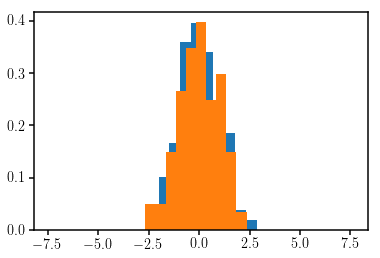

In [93]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(gauss, normed=True)
_ = sub.hist(gauss2, normed=True)

In [94]:
kNN = KNNDivergenceEstimator(div_funcs=["renyi:.8"], Ks=[2], version='slow')
feat = Features([gauss, gauss2])
div_knn = kNN.fit_transform(feat)
print div_knn

[[[[-0.          0.09514674]
   [ 0.         -0.        ]]]]
